In [28]:
import torch
from torch_geometric.data import Data

x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=torch.float)

# Define edge connections (e.g., 6 edges)
edge_index = torch.tensor([[0, 1, 2, 3, 0, 2], 
                           [1, 0, 3, 2, 2, 0]], dtype=torch.long)

# Define edge attributes (e.g., each edge has 5 features)
edge_attr = torch.tensor([
    [0.5, 0.7, 0.1, 0.2, 0.3],
    [0.6, 0.8, 0.1, 0.2, 0.3],
    [0.9, 0.4, 0.1, 0.2, 0.3],
    [0.3, 0.9, 0.1, 0.2, 0.3],
    [0.7, 0.3, 0.1, 0.2, 0.3],
    [0.4, 0.5, 0.1, 0.2, 0.3]
], dtype=torch.float)

# Create a Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

In [66]:
def compute_interaction(attr, k, epsilon):
    """
    Compute the force ...

    Args:
    -----

    """
    
    bij = attr[:, -1] + attr[:, -2]

    force = torch.zeros((attr.shape[0], 2))

    rij = torch.zeros((attr.shape[0], 2))
    rij[:, 0] = attr[:, 0] * attr[:, 1]
    rij[:, 1] = attr[:, 0] * attr[:, 2]


    force[:, 0] = torch.where(attr[:, 0] < bij * (1 + epsilon),
                         k*(attr[:, 0] - bij)*rij[:, 0]/attr[:, 0],
                           force[:, 0])
    
    force[:, 1] = torch.where(attr[:, 0] < bij * (1 + epsilon),
                         k*(attr[:, 0] - bij)*rij[:, 1]/attr[:, 0],
                           force[:, 1])
    
    
    force[:, 0] = torch.where((attr[:, 0] > bij*(1 + epsilon)) & (attr[:, 0] < bij*(1 + 2*epsilon)), 
                        -k*(attr[:, 0] - bij - 2*epsilon*bij)*rij[:, 0]/attr[:, 0], 
                        force[:, 0])
    
    force[:, 1] = torch.where((attr[:, 0] > bij*(1 + epsilon)) & (attr[:, 0] < bij*(1 + 2*epsilon)),
                         -k*(attr[:, 0] - bij - 2*epsilon*bij)*rij[:, 1]/attr[:, 0], 
                        force[:, 1])
    return force

In [67]:
def calculate_interaction(dist, rij, k, epsilon, radii = 1.0):
    """
    Given the vectors ri and rj, compute the force between them
    """


    r = dist

    # Combined radius of both particles (assume unit radii for now)
    #bij = 2.0                       # Ri + Rj 
    bij = radii + radii

    if r < bij*(1 + epsilon):
        force = k*(r - bij)*rij/r  
        #print(k*(r - bij))
    elif r < bij*(1 + 2*epsilon):
        force = -k*(r - bij - 2*epsilon*bij)*rij/r
    else:
        force = torch.tensor([0.0, 0.0])
    return force


def getForces(attr, k, epsilon):
    res = torch.zeros((attr.shape[0], 2))

    rij = torch.zeros((attr.shape[0], 2))
    rij[:, 0] = attr[:, 0] * attr[:, 1]
    rij[:, 1] = attr[:, 0] * attr[:, 2]

    for i in range(attr.shape[0]):
        res[i, :] = calculate_interaction(attr[i, 0], rij[i], k, epsilon, radii = 1.0)

    return res

In [68]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=torch.float)

# Define edge connections (e.g., 6 edges)
edge_index = torch.from_numpy([[0, 1, 2, 3, 0, 2], 
                           [1, 0, 3, 2, 2, 0]], dtype=torch.long)

# Define edge attributes (e.g., each edge has 5 features)
edge_attr = torch.tensor([
    [0.5, 0.7, 0.1, 0.2, 0.3],
    [0.6, 0.8, 0.1, 0.2, 0.3],
    [0.9, 0.4, 0.1, 0.2, 0.3],
    [0.3, 0.9, 0.1, 0.2, 0.3],
    [0.7, 0.3, 0.1, 0.2, 0.3],
    [0.4, 0.5, 0.1, 0.2, 0.3]
], dtype=torch.float)

# Create a Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

TypeError: torch._VariableFunctionsClass.from_numpy() takes no keyword arguments

In [69]:
edge_gen = torch.from_numpy(np.random.random((200, 5))* 6)
edge_gen[:, -1] = 1
edge_gen[:, -2] = 1

In [70]:
res = compute_interaction(edge_gen, k = 70, epsilon = 0.5)

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.], dtype=torch.float64)
tensor([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
  

In [71]:
r2 = getForces(edge_gen, k = 70, epsilon = 0.5)

In [72]:
print(res)

tensor([[ 2.0629e+01,  2.3574e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-5.1942e+02, -3.6699e+01],
        [ 8.6589e+00,  3.8873e+00],
        [-3.3200e+02, -4.8982e+02],
        [ 2.4567e+01,  1.7176e+01],
        [ 7.3331e+00,  1.5492e+01],
        [-2.7652e+02, -3.4763e+02],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 1.9396e+02,  7.0952e+01],
        [ 2.9312e+02,  3.8532e+02],
        [ 9.4080e+01,  9.0410e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 3.1593e-01,  3.5603e+01],
        [-4.1070e+02, -3.9926e+02],
        [ 3.7310e+02,  2.7460e+02],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-1.8249e+01, -4.6029e+02],
        [-1.9803e+02, -4.0813e+02],
        [ 2.9532e+00,  3.2330e+01],
        [-1.2007e+02, -5.3313e+01],
        [ 8.1273e+00,  3.5414e+00],
        [ 1.2440e+01,  6.8054e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 1.5878e+01,  8.575

In [73]:
print(r2)

tensor([[ 2.0629e+01,  2.3574e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-5.1942e+02, -3.6699e+01],
        [ 8.6589e+00,  3.8873e+00],
        [-3.3200e+02, -4.8982e+02],
        [ 2.4567e+01,  1.7176e+01],
        [ 7.3331e+00,  1.5492e+01],
        [-2.7652e+02, -3.4763e+02],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 1.9396e+02,  7.0952e+01],
        [ 2.9312e+02,  3.8532e+02],
        [ 9.4080e+01,  9.0410e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 3.1593e-01,  3.5603e+01],
        [-4.1070e+02, -3.9926e+02],
        [ 3.7310e+02,  2.7460e+02],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [-1.8249e+01, -4.6029e+02],
        [-1.9803e+02, -4.0813e+02],
        [ 2.9532e+00,  3.2330e+01],
        [-1.2007e+02, -5.3313e+01],
        [ 8.1273e+00,  3.5414e+00],
        [ 1.2440e+01,  6.8054e+01],
        [ 0.0000e+00,  0.0000e+00],
        [ 1.5878e+01,  8.575

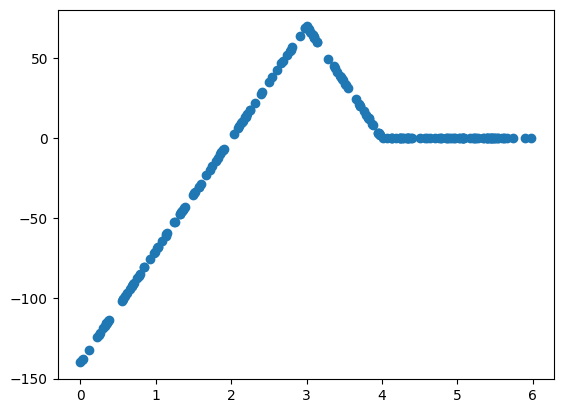

In [76]:
import matplotlib.pyplot as plt
plt.scatter(edge_gen[:, 0], res[:, 1] / edge_gen[:, 2])
plt.show()

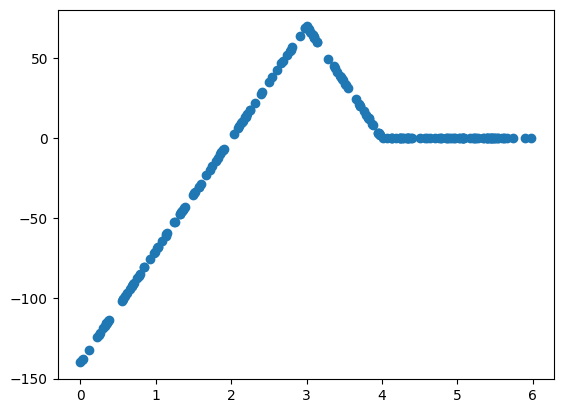

In [77]:
import matplotlib.pyplot as plt
plt.scatter(edge_gen[:, 0], r2[:, 1] / edge_gen[:, 2])
plt.show()

In [17]:
print(data)

Data(x=[4, 3], edge_index=[2, 6], edge_attr=[6, 5])


In [18]:
print(data.x)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [19]:
print(data.edge_index)

tensor([[0, 1, 2, 3, 0, 2],
        [1, 0, 3, 2, 2, 0]])


In [20]:
print(data.edge_attr)

tensor([[0.5000, 0.7000, 0.1000, 0.2000, 0.3000],
        [0.6000, 0.8000, 0.1000, 0.2000, 0.3000],
        [0.9000, 0.4000, 0.1000, 0.2000, 0.3000],
        [0.3000, 0.9000, 0.1000, 0.2000, 0.3000],
        [0.7000, 0.3000, 0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.1000, 0.2000, 0.3000]])


In [21]:
import numpy as np

In [22]:
class Params():
    def __init__(self):
        self.probDataAug = 1
        self.augBool = 1
        self.displayBoolAug = False

In [23]:
p = Params()

In [26]:
def dataAugFun(data, params, device = 'cpu'):
    """ 
    Data augmentation function
    Implements only the noisy steps on the speeds ...
    """


    pCutoff = params.probDataAug
    augBool = params.augBool
    
    
    if params.displayBoolAug:
        print('>>>>>>> INFOS: data augmentation:')
        print(f'probability of the data augmentation >>> {pCutoff}')
        print(f'activation of the data augmentation >>> {augBool}')
        params.displayBoolAug = False
        
    if augBool:
        stdSpeed = 0.01 * torch.abs(data.x)
        meanSpeedNormal = torch.zeros_like(data.x)
        stdDeltaPos = 0.02
        stdCos = 0.002
        stdRadius = 0.0005

        p2 = np.random.uniform(0, 1)
        if p2 < pCutoff:   #noise
            rdNb = torch.normal(mean=meanSpeedNormal, std=stdSpeed).to(device)
            rdNb2 = torch.normal(mean=0, std=stdDeltaPos, size=(data.edge_attr.shape[0], 1), device=device)
            rdNb3 = torch.normal(mean=0, std=stdCos, size=(data.edge_attr.shape[0], 2), device=device)
            rdNb4 = torch.normal(mean=0, std=stdRadius, size=(data.edge_attr.shape[0], 2), device=device)

            data.x += rdNb
            data.edge_attr[:, 0] += rdNb2.squeeze()
            data.edge_attr[:, 1:3] += rdNb3
            data.edge_attr[:, 3:] += rdNb4


    return data

In [27]:
data2 = dataAugFun(data, p)